# Student Performance Indicator

## Problem Statement
#### This Project understands how the student's performance (test scores) is affected by other variables such as Gender,Ethnicity, Parental level 
#### of Education and Test preparation course.

##### Import Data and Required Packages

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info

<bound method DataFrame.info of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none    

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
##### - From above description of numerical data, all means are very close to each other - between 66 and 68.05
##### - All standard deviations are also close - between 14.6 and 15.19
##### - While there is a minimunm score 0 for math, for writing minimum is much higher =10 and for reading much higher =17

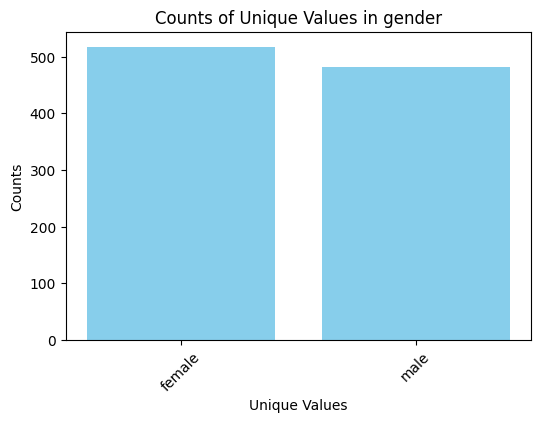

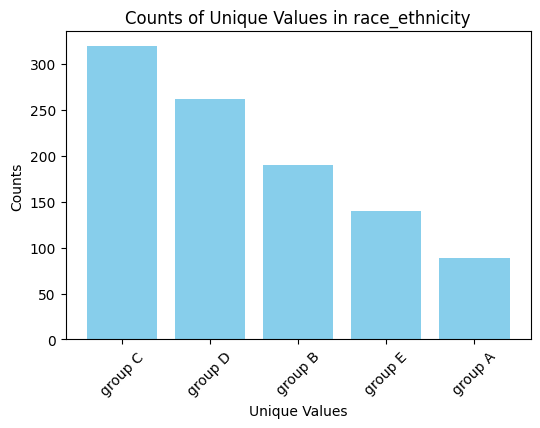

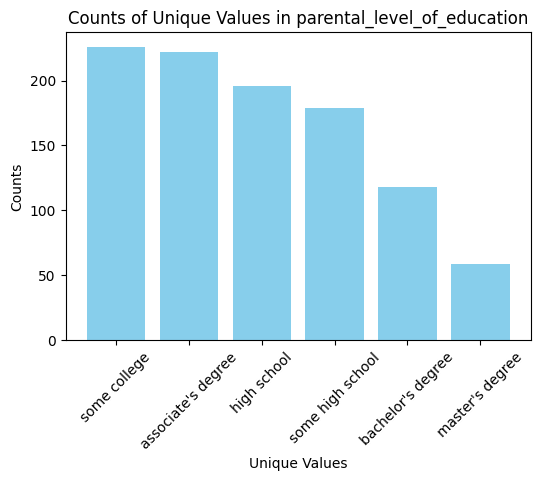

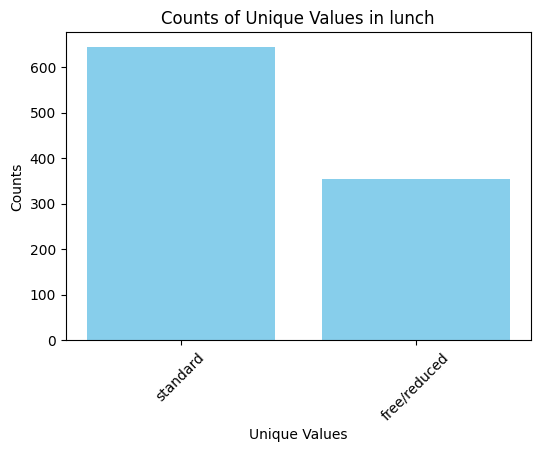

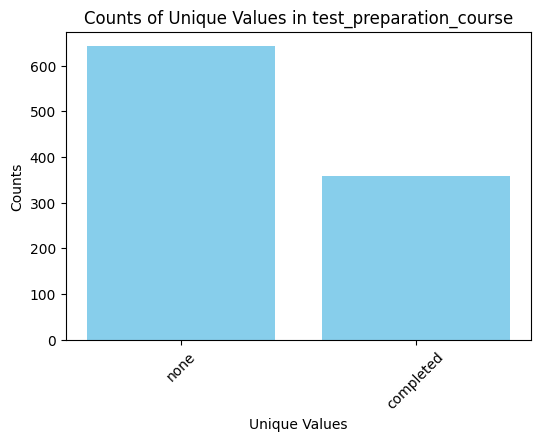

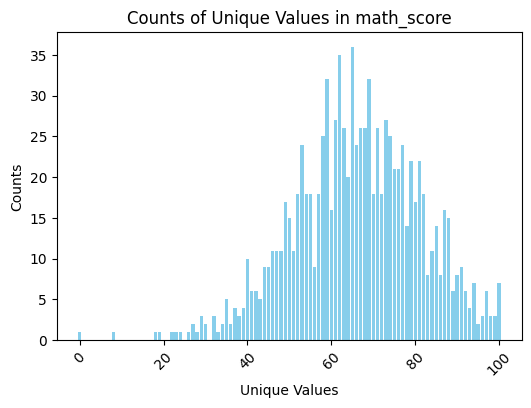

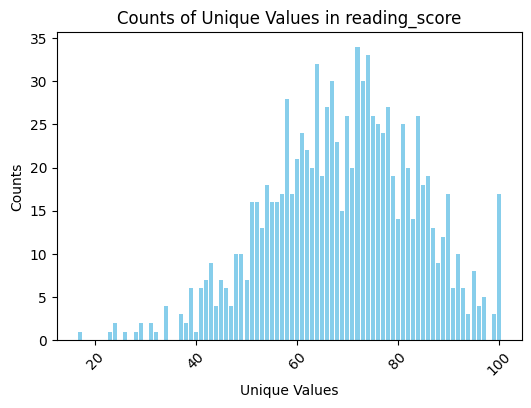

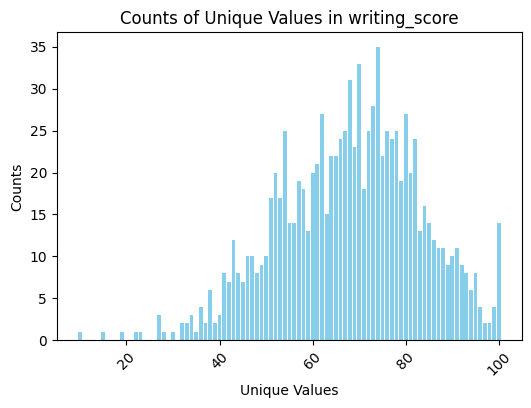

In [10]:
for column in df.columns:
    value_counts = df[column].value_counts()
    plt.figure(figsize=(6,4))
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.title(f'Counts of Unique Values in {column}')
    plt.xlabel('Unique Values')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
df['Total_Score']=df['math_score'] + df['reading_score'] +df['writing_score']
df['average']=df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score'] ==100]['average'].count()
writing_full = df[df['writing_score'] ==100]['average'].count()
math_full = df[df['math_score'] ==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20 = df[df['math_score'] <=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
##### - From above values we get that students have performed the worst in Maths.
##### - Best performance is in reading section.

---

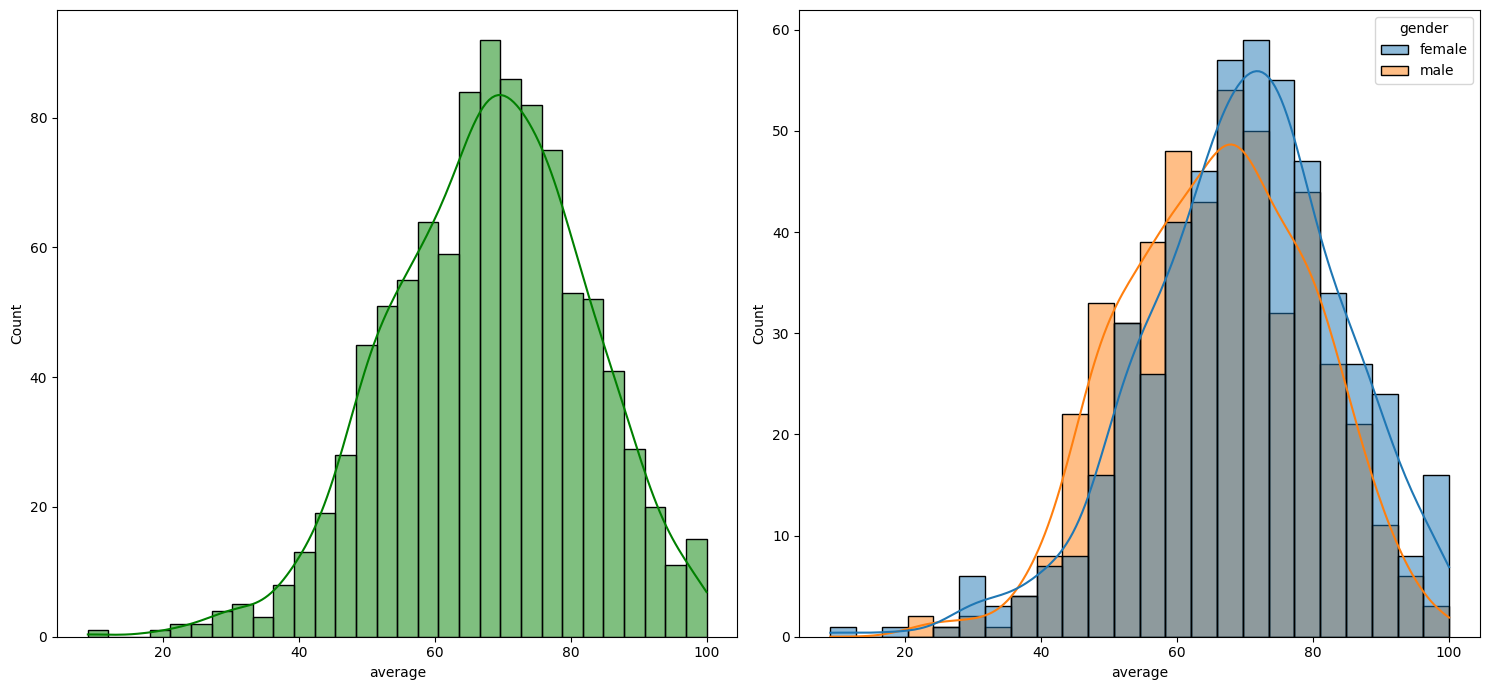

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
plt.tight_layout()
plt.show()


#### Insights
##### Female students tend to perform well then male students.

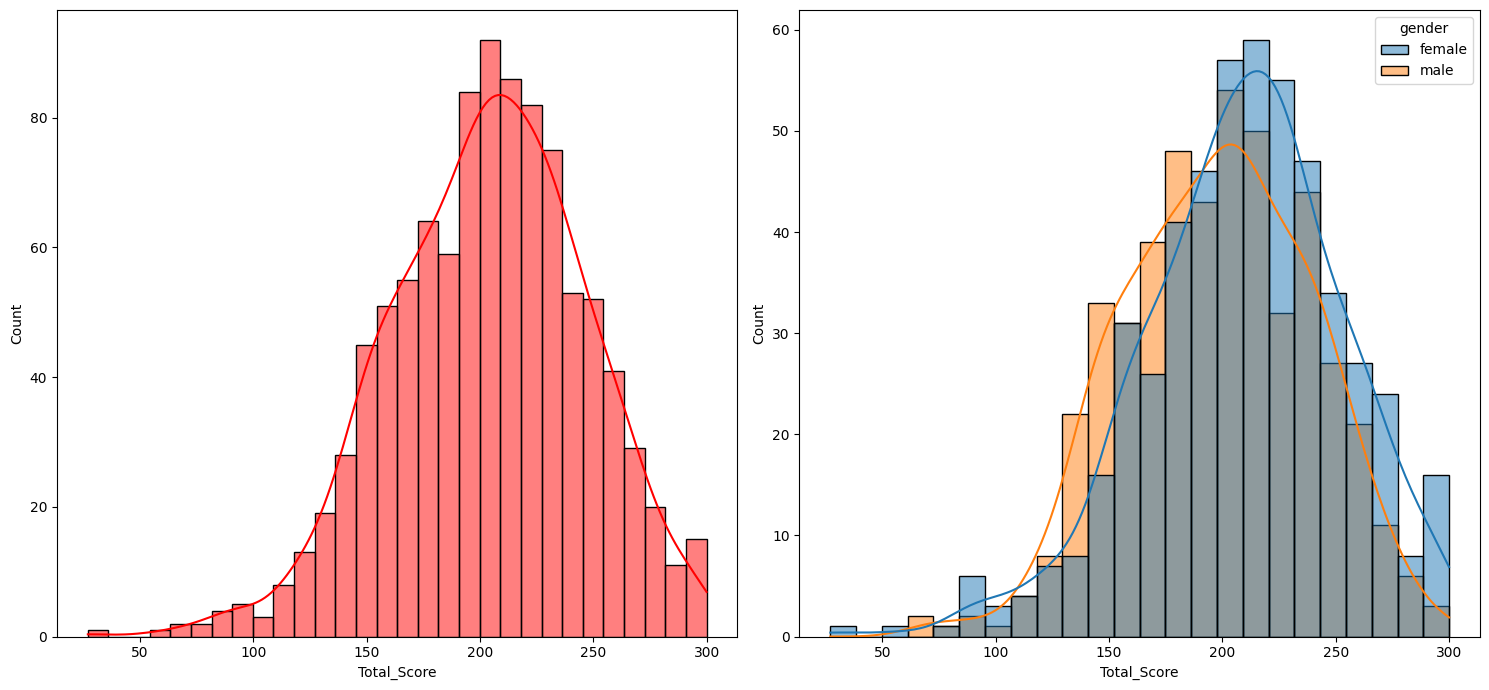

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='Total_Score', bins=30, kde=True, color='r', ax=axs[0])
sns.histplot(data=df, x='Total_Score', kde=True, hue='gender', ax=axs[1])
plt.tight_layout()
plt.show()

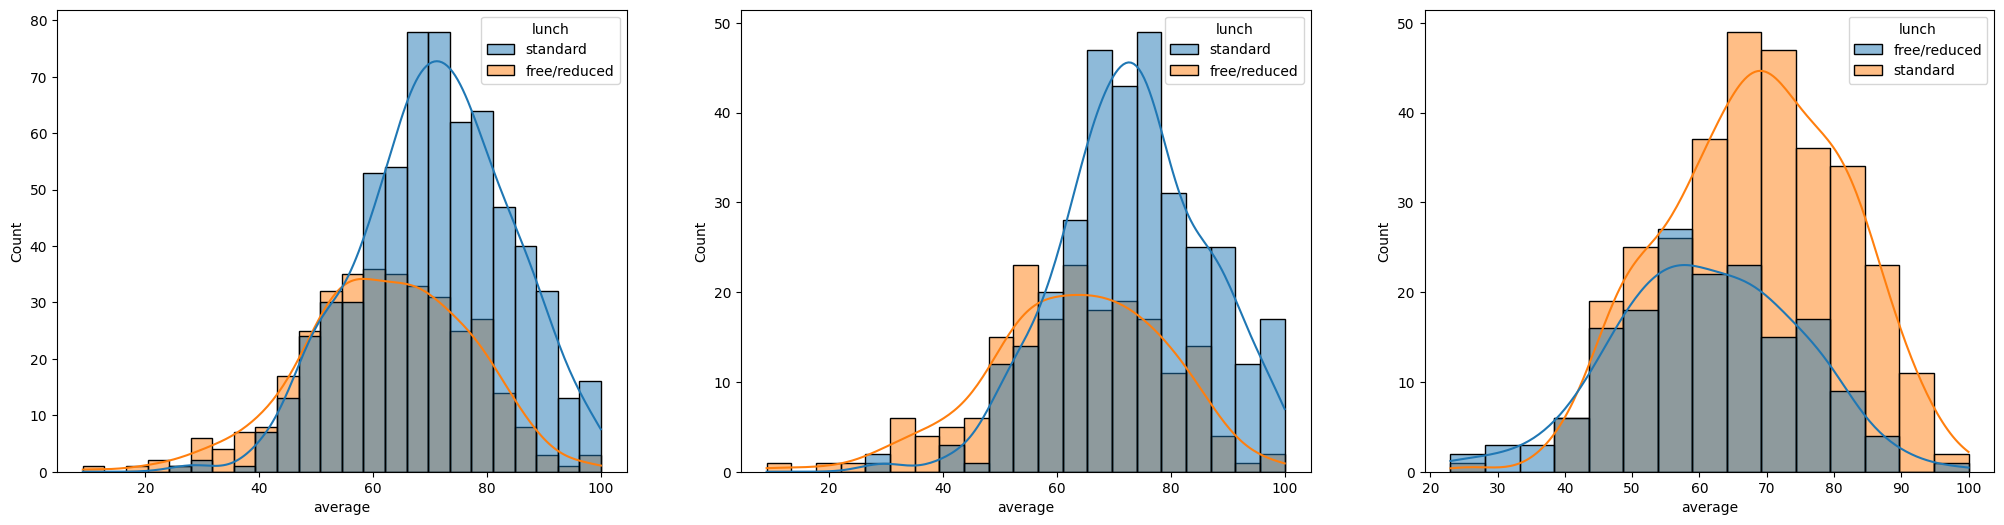

In [21]:
fig, axes=plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='lunch', ax=axes[0])
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', ax =axes[1])
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', ax=axes[2])
plt.show()


#### Insights
#### - Standard lunch helps perform well in exams.
#### - Standard lunch helps perform weel in exams be it a male or a female.

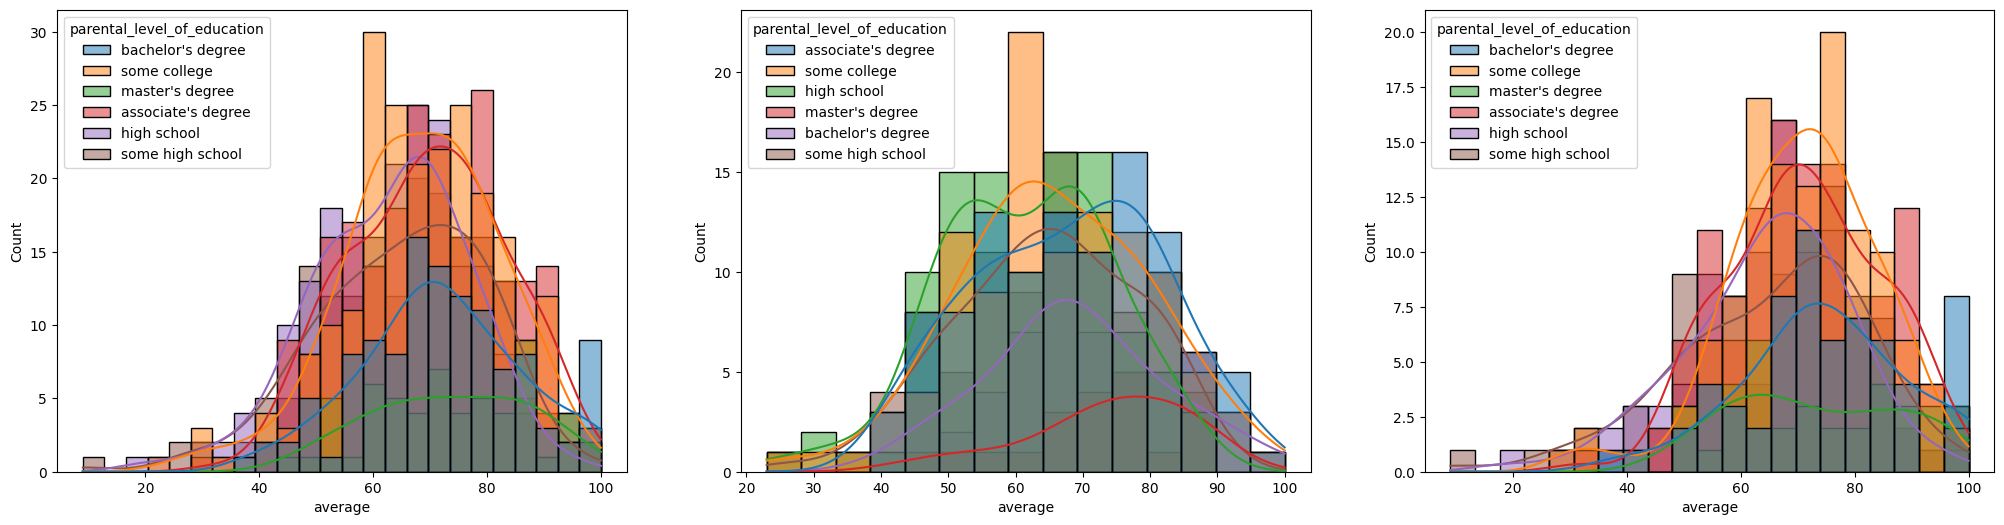

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
plt.show()


#### Insights
#### In general parent's education don't help student perform well in exam.
#### 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
#### 3rd plot we can see there is no effect of parent's education on female students

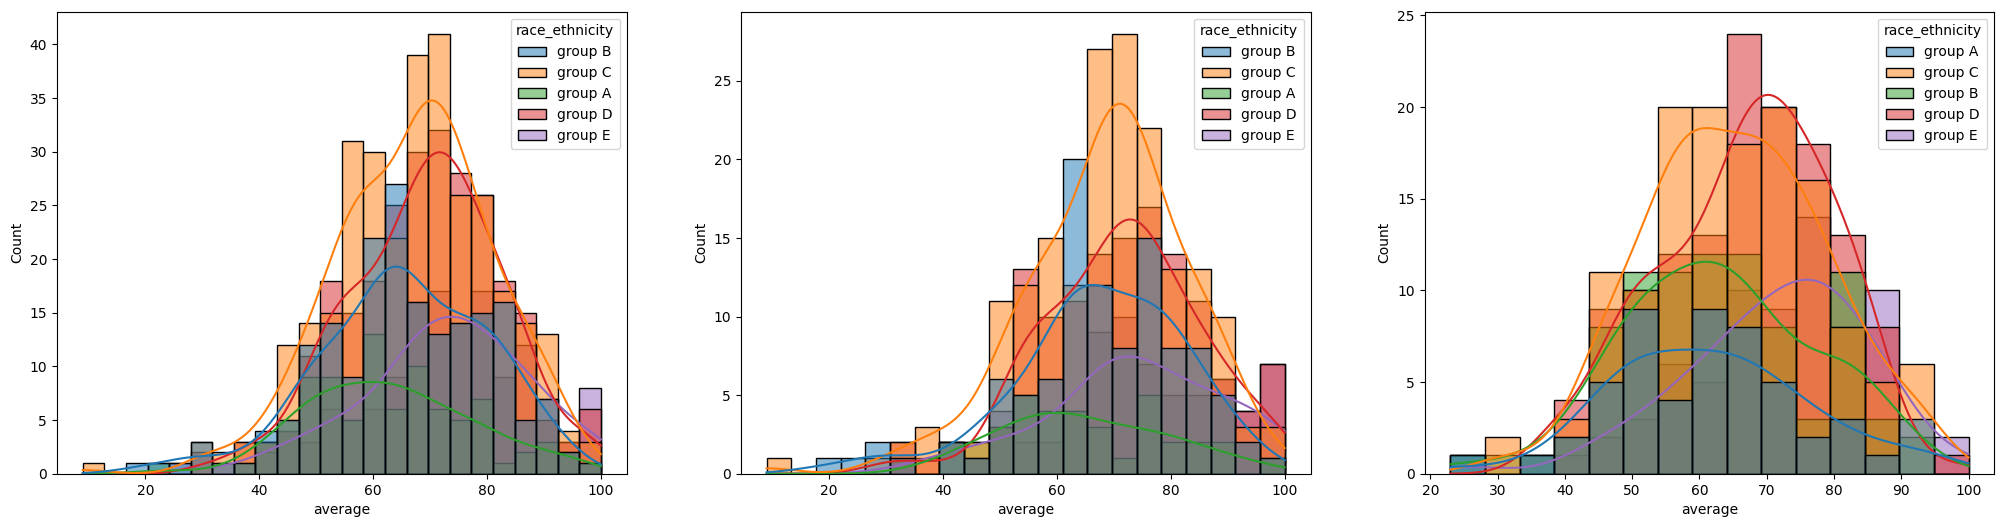

In [27]:
fig,axes = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',ax=axes[0])
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',ax=axes[1])
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',ax=axes[2])
plt.show()

#### Insights
#### Students of group A and group B tends to perform poorly in exam.
#### Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


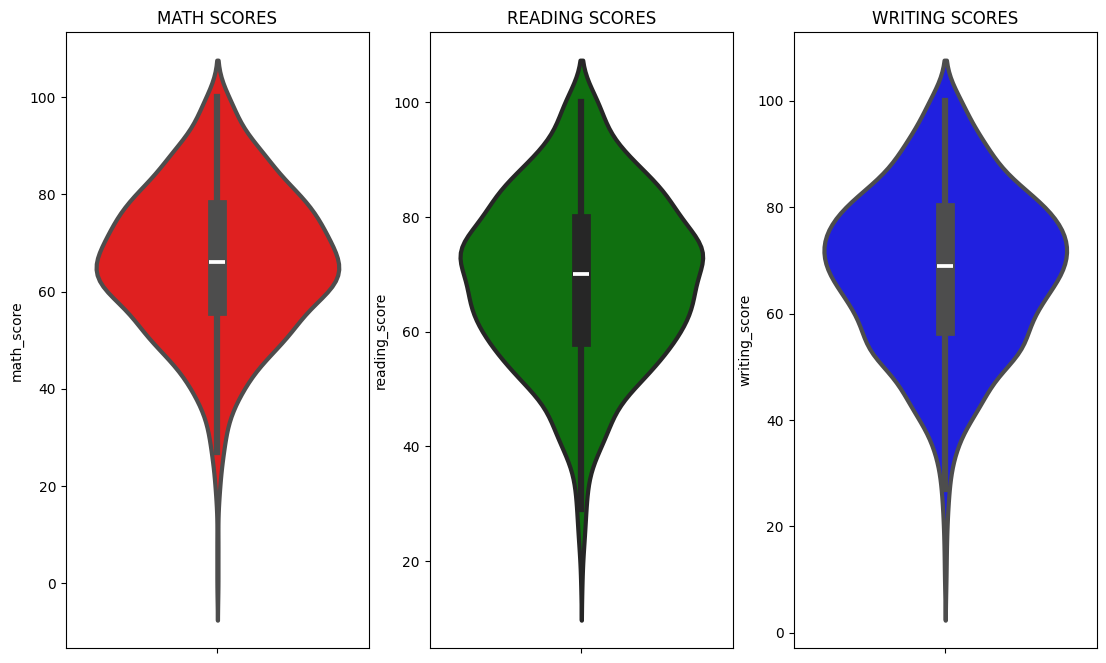

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
#### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

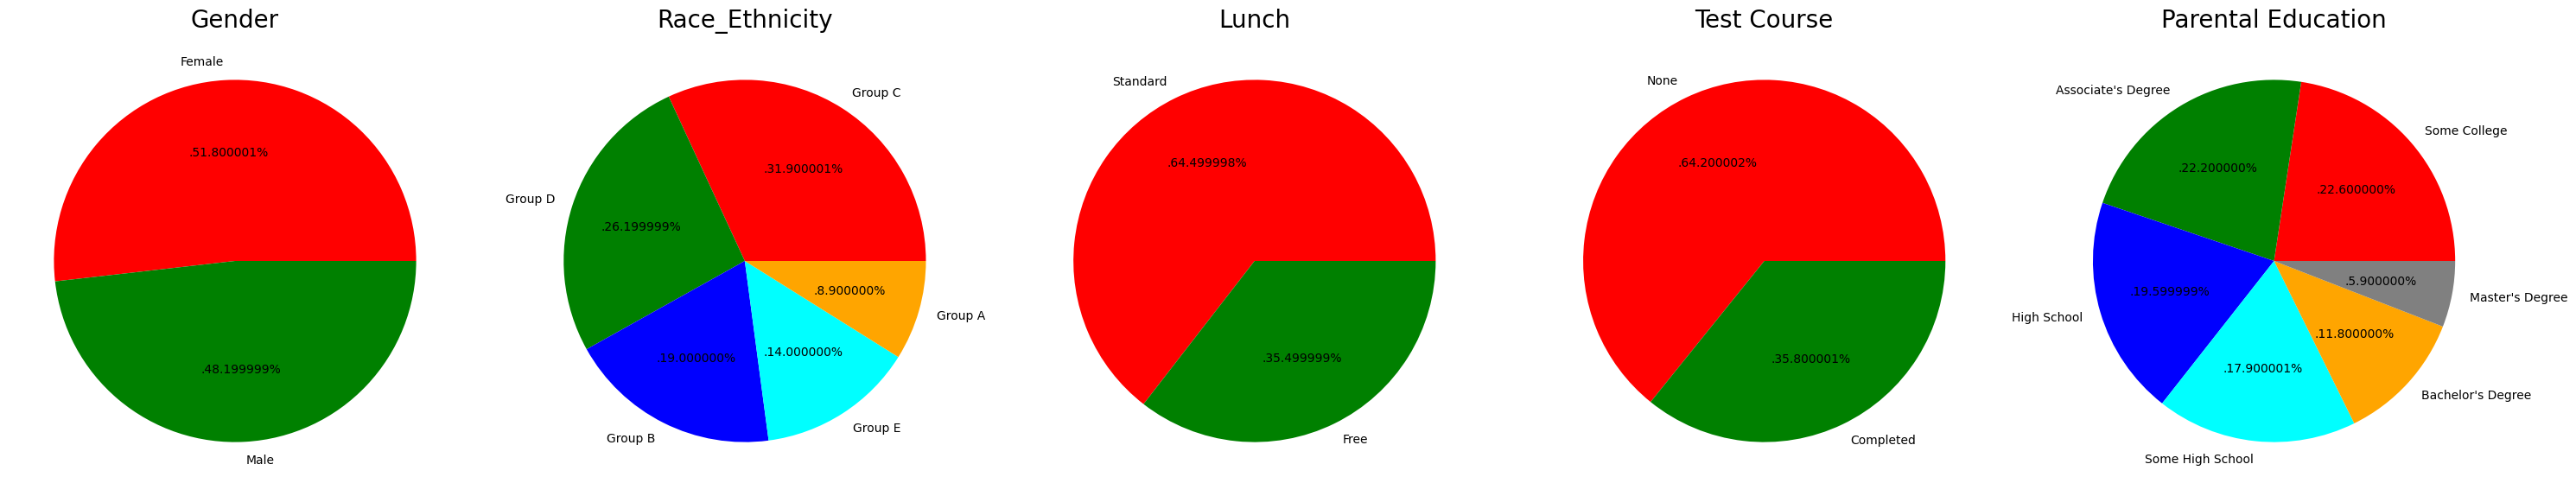

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


#### Insights
##### Number of Male and Female students is almost equal
##### Number students are greatest in Group C
##### Number of students who have standard lunch are greater
##### Number of students who have not enrolled in any test preparation course is greater
##### Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

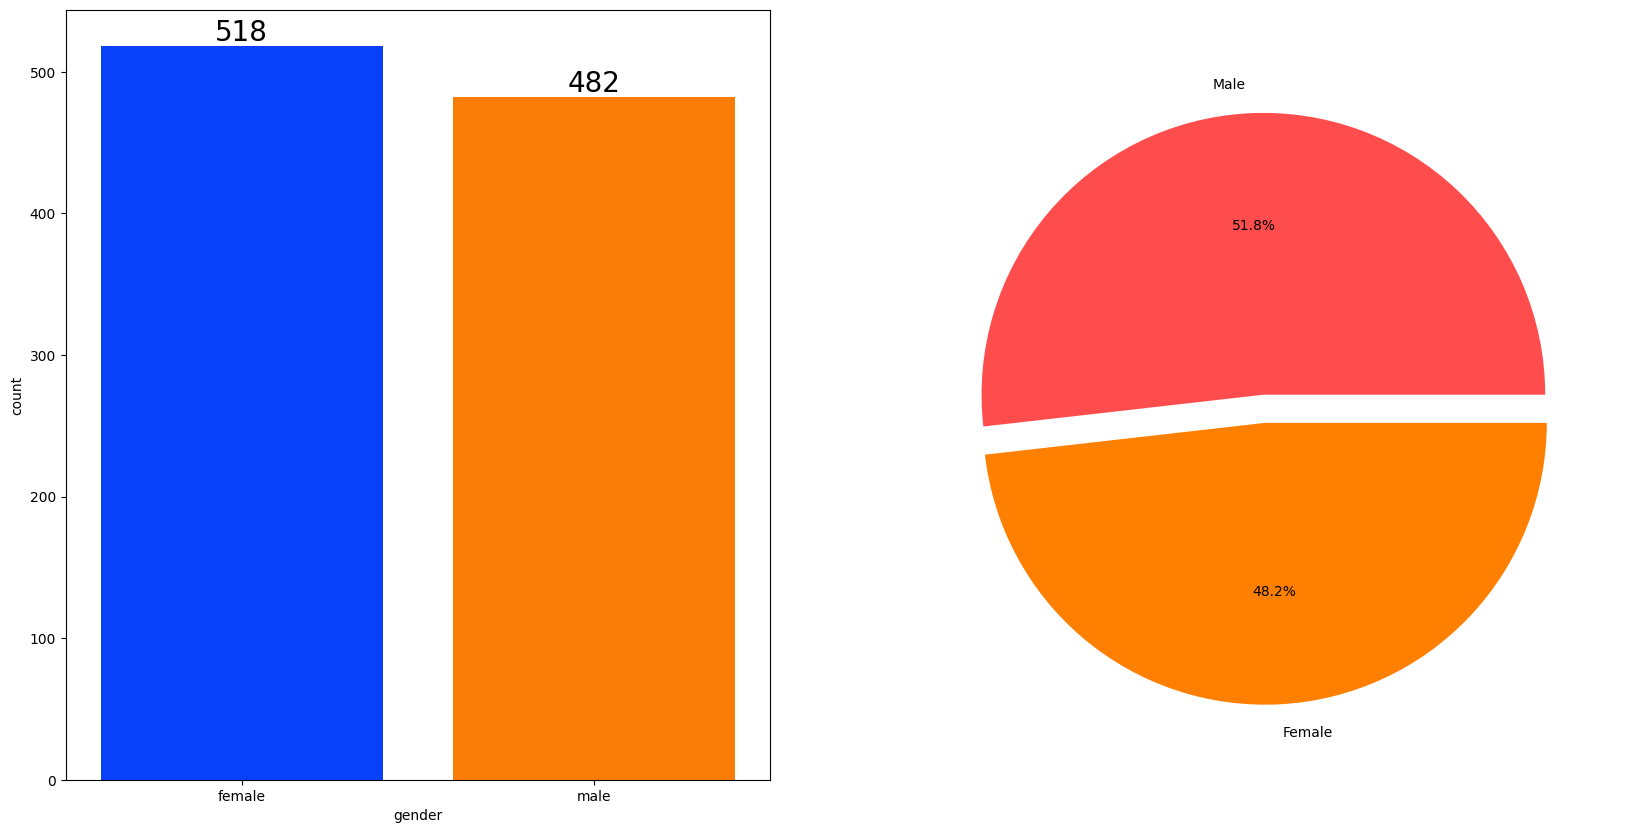

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
##### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

---

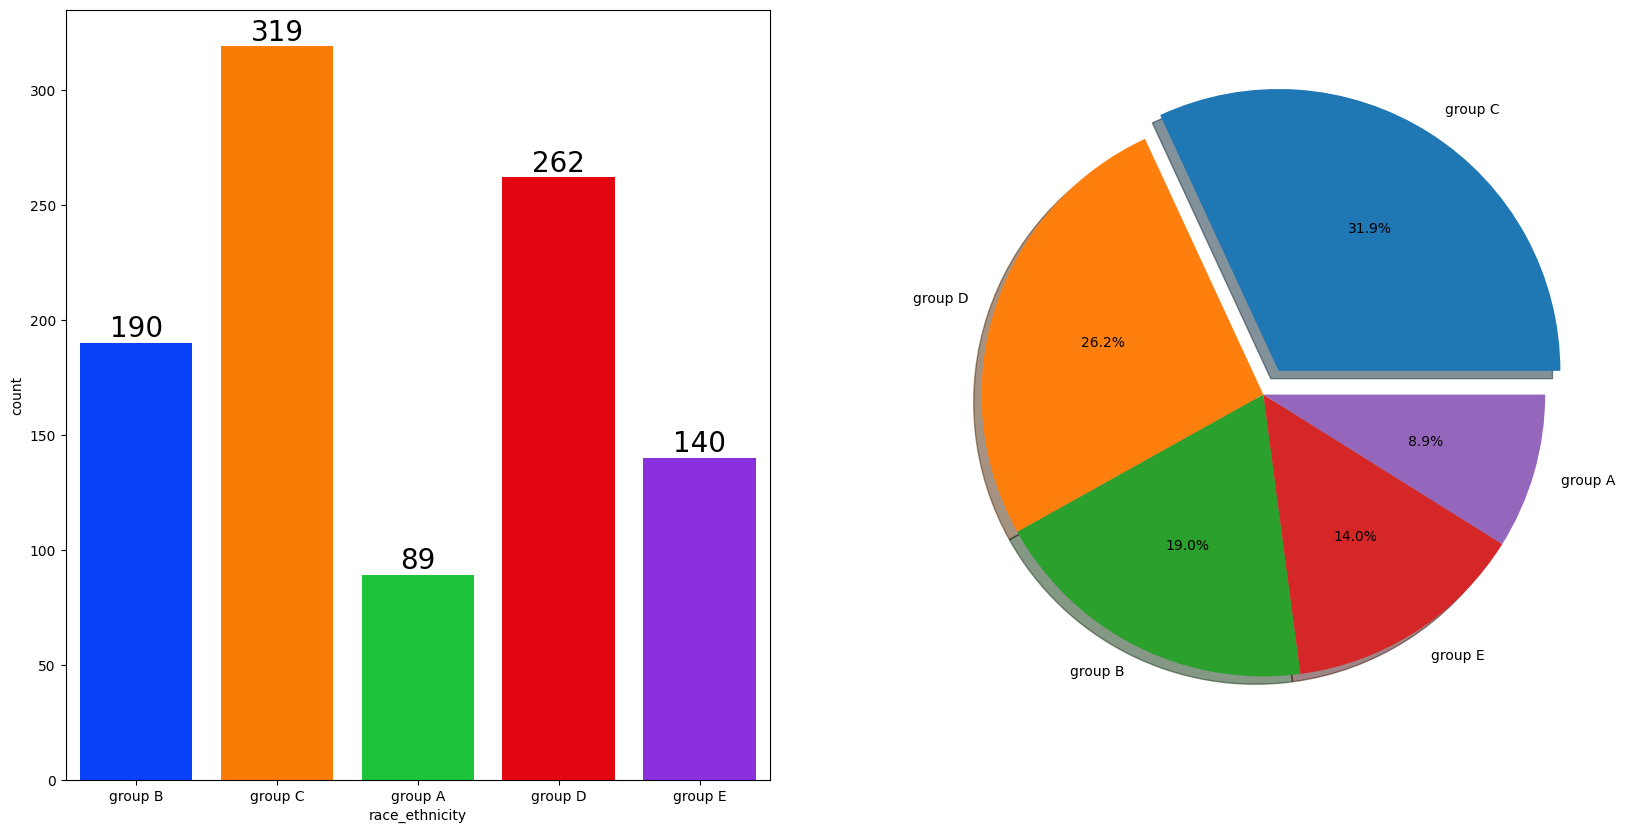

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
##### Most of the student belonging from group C/group D.
##### Lowest number of students belong to group A.

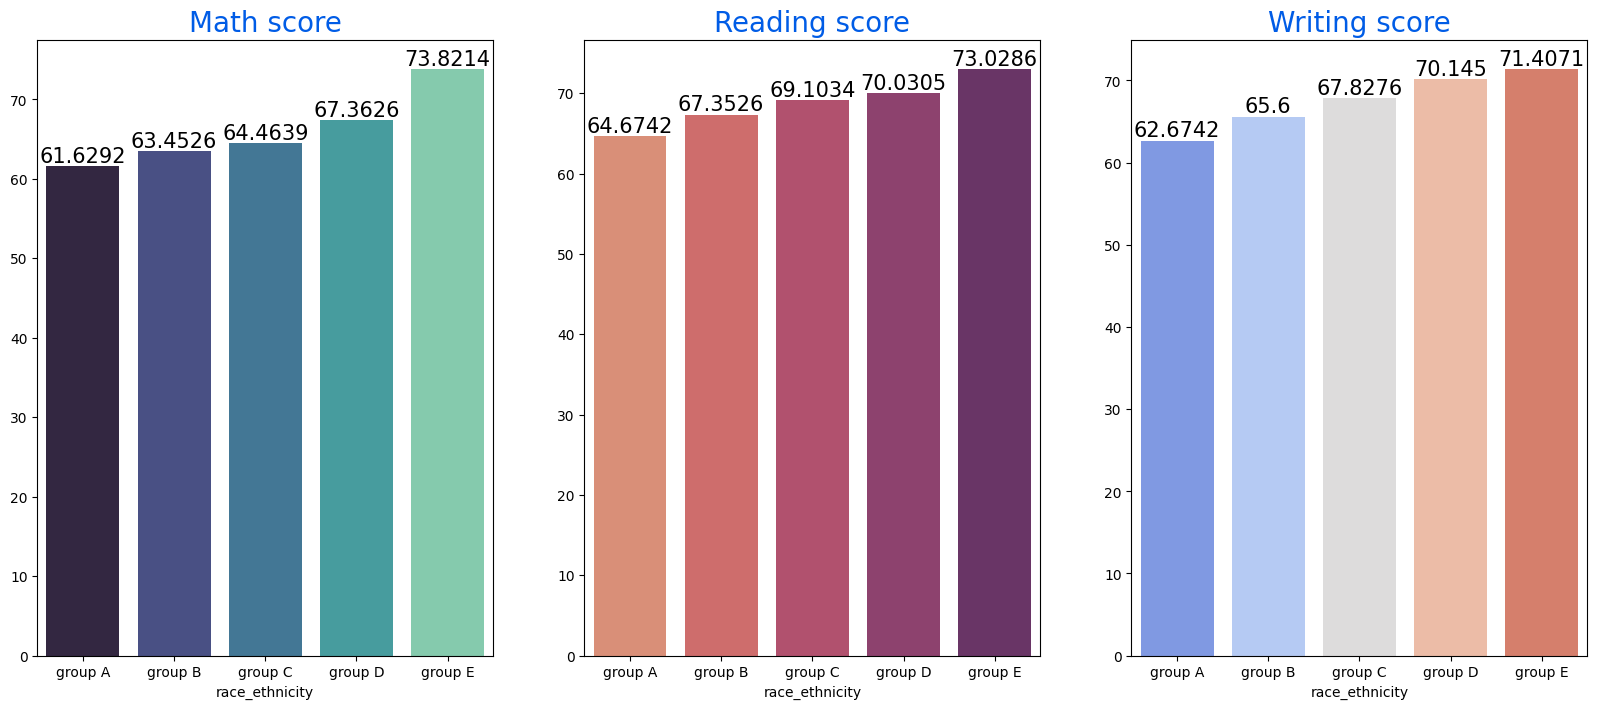

In [41]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
##### Group E students have scored the highest marks.
##### Group A students have scored the lowest marks.
##### Students from a lower Socioeconomic status have a lower avg in all course subjects

--- 

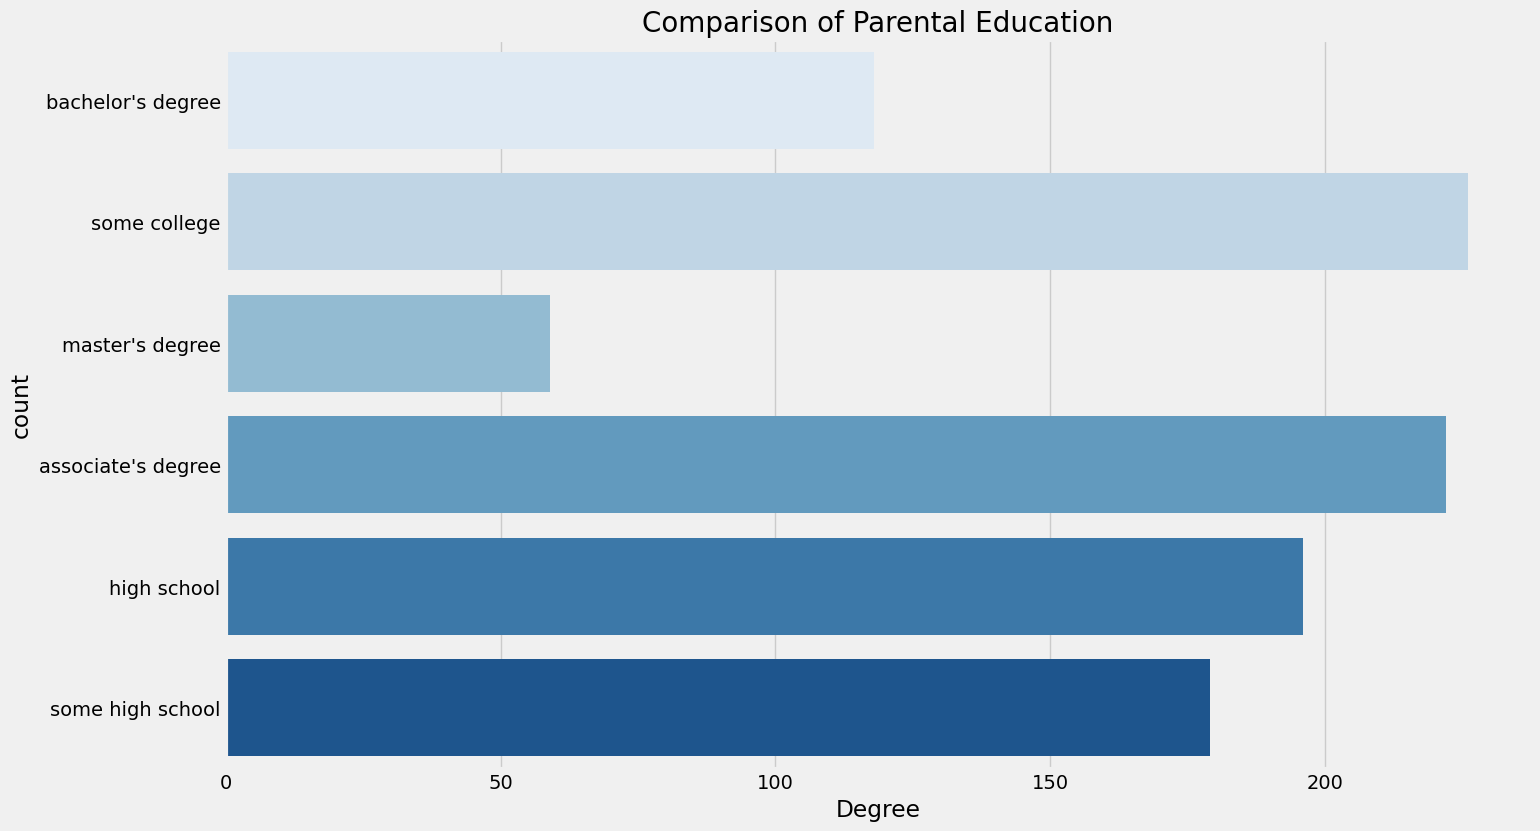

In [42]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
##### Largest number of parents are from college.

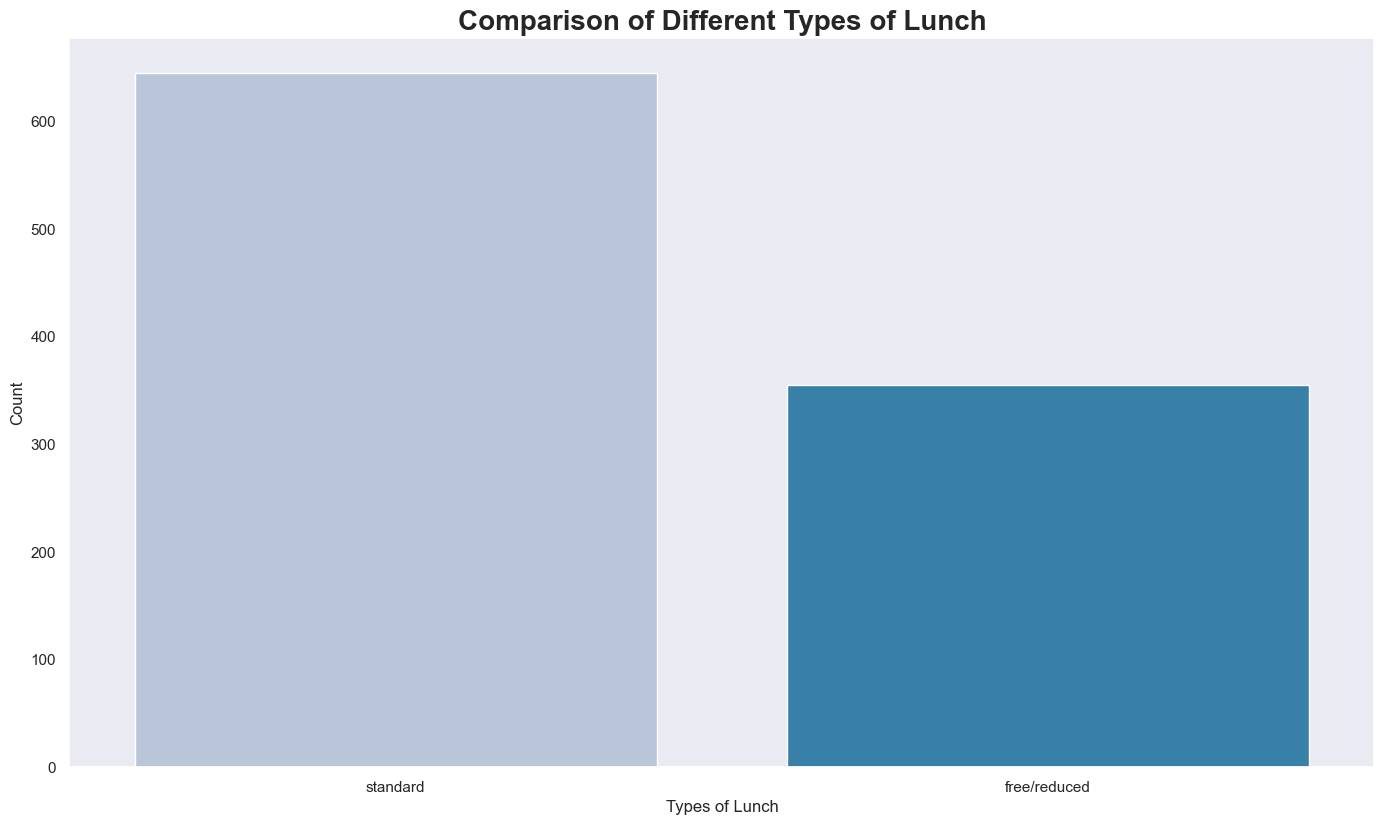

In [61]:
sns.set_theme(style='dark') 
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### Insights
##### Students being served Standard lunch was more than free lunch.

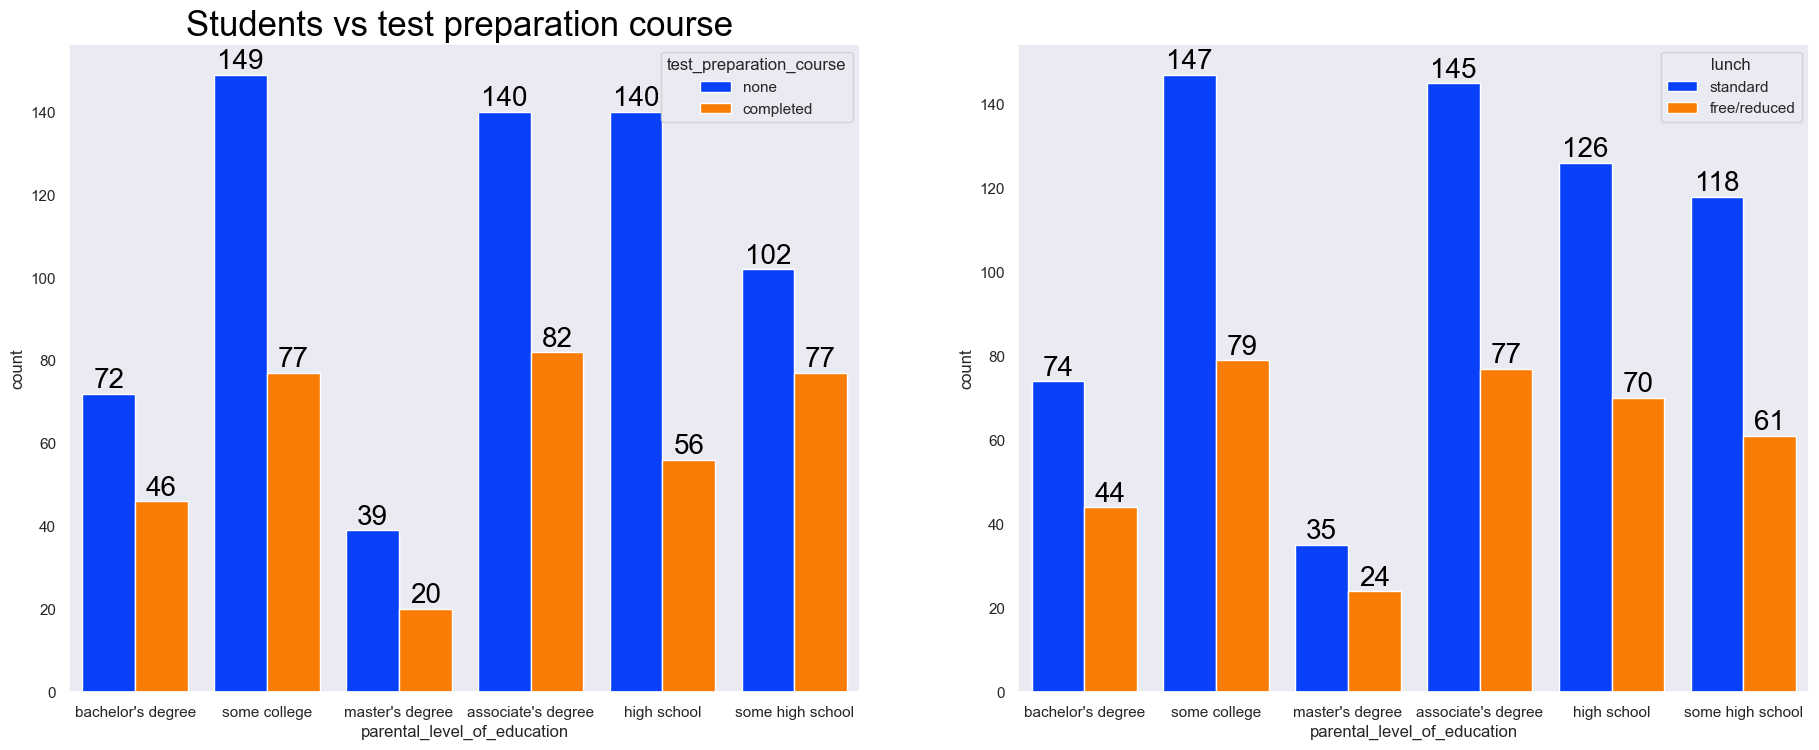

In [62]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

#### Insights
##### Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

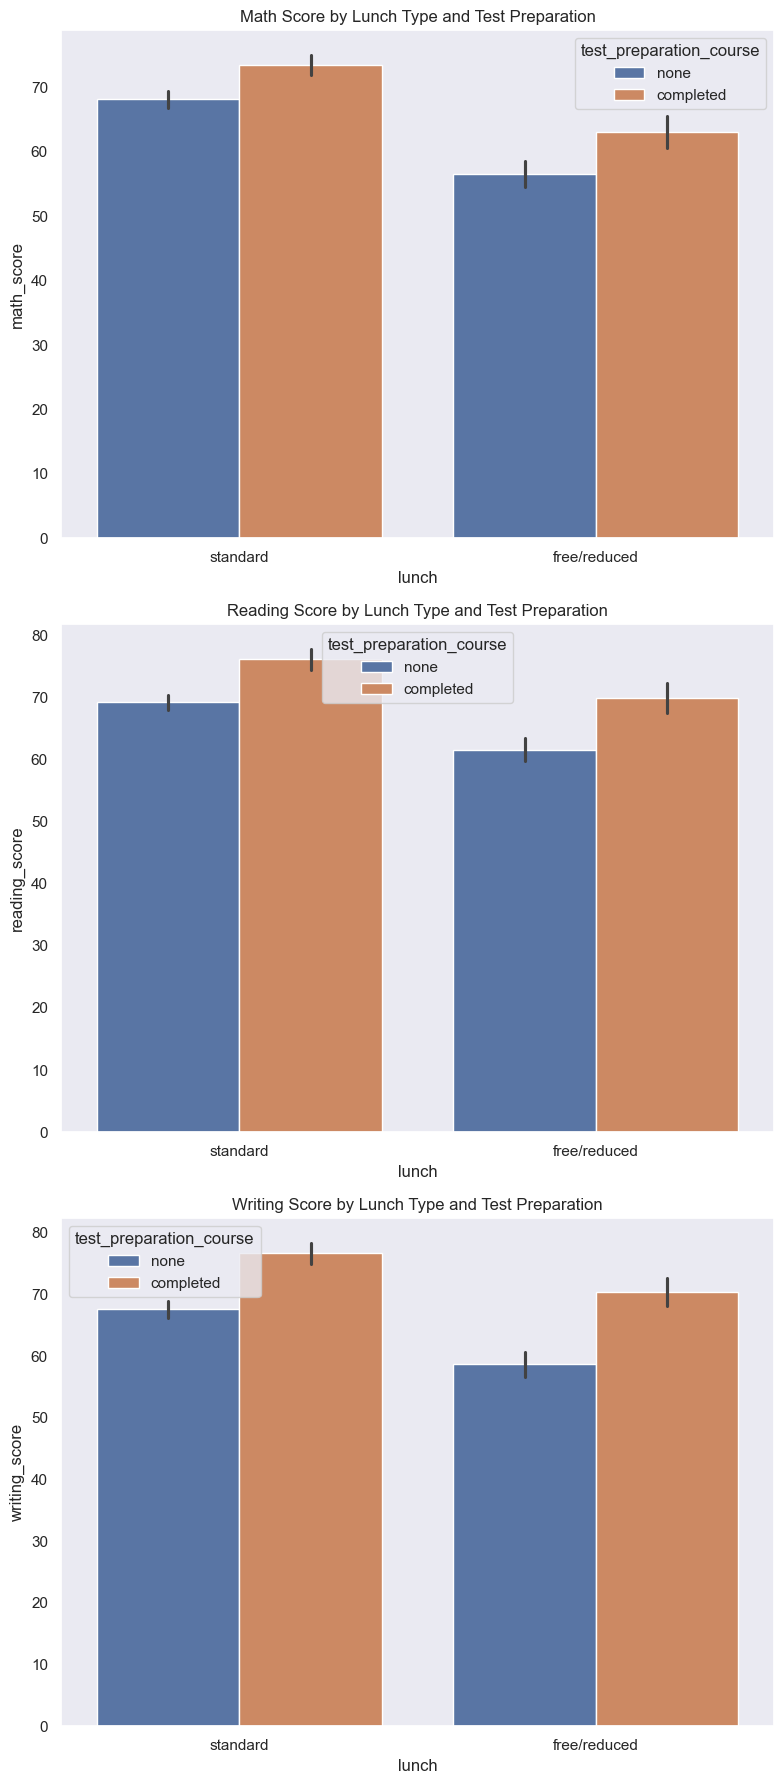

In [ ]:
plt.figure(figsize=(8, 18)) 
plt.subplot(3, 1, 1) 
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.title('Math Score by Lunch Type and Test Preparation')
plt.subplot(3, 1, 2) 
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.title('Reading Score by Lunch Type and Test Preparation')
plt.subplot(3, 1, 3)  
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.title('Writing Score by Lunch Type and Test Preparation')
plt.tight_layout()
plt.show()


#### Insights
##### Students who have completed the Test Preparation Course have scores higher in all three categories than those ho haven't taken the course.

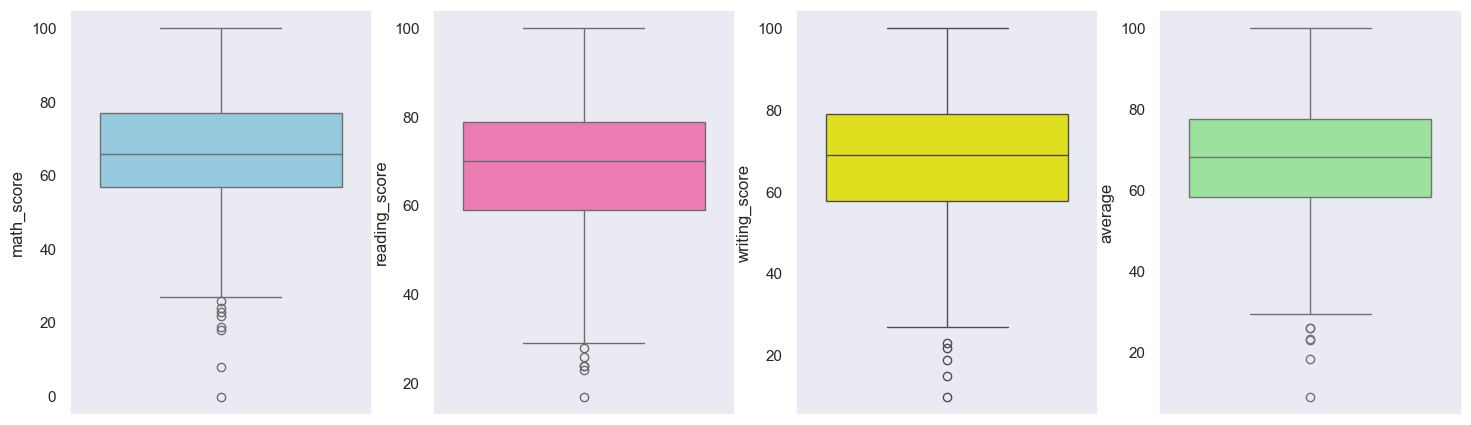

In [75]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

---

### Conclusions
##### Student's Performance is related with lunch, race, parental level education
##### Females lead in pass percentage and also are top-scorers
##### Student's Performance is not much related with test preparation course
##### Finishing preparation course is benefitial.

---